In [2]:
import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt
from scipy.misc import derivative

In [2]:
# This is supposed to display all the outputs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### Symbolic Case

if you know the formula explicitly:  
**Example** :
$$
f(x) = e^{-a\sin(x^2)} \cdot \sin(b^x) \cdot \ln (c \sin^2(x)/x)
$$

In [3]:
x, a, b, c = smp.symbols('x, a, b, c', real=True)

In [4]:
f = (smp.exp(-a*smp.sin(x**2))) * (smp.sin(b**x)) * (smp.log(c*smp.sin(x)**2 / x))
f

exp(-a*sin(x**2))*log(c*sin(x)**2/x)*sin(b**x)

In [5]:
df_dx = smp.diff(f,x)
df_dx

-2*a*x*exp(-a*sin(x**2))*log(c*sin(x)**2/x)*sin(b**x)*cos(x**2) + b**x*exp(-a*sin(x**2))*log(b)*log(c*sin(x)**2/x)*cos(b**x) + x*(2*c*sin(x)*cos(x)/x - c*sin(x)**2/x**2)*exp(-a*sin(x**2))*sin(b**x)/(c*sin(x)**2)

Can take the nth derivative $\frac{d^nf}{dx^n}$ by putting an optional argument at the end `smp.diff(f, x, n)`

In [6]:
d4f_dx = smp.diff(f,x,4)
d4f_dx

(24*a*b**x*x*(b**x*sin(b**x) - cos(b**x))*(2*cos(x) - sin(x)/x)*log(b)**2*cos(x**2)/sin(x) + 8*a*b**x*x*(b**(2*x)*cos(b**x) + 3*b**x*sin(b**x) - cos(b**x))*log(b)**3*log(c*sin(x)**2/x)*cos(x**2) + 24*a*b**x*x*(2*(2*cos(x) - sin(x)/x)*cos(x)/sin(x) + 2*(sin(x)**2 - cos(x)**2 + 2*sin(x)*cos(x)/x - sin(x)**2/x**2)/sin(x) - (2*cos(x) - sin(x)/x)/x)*log(b)*cos(b**x)*cos(x**2)/sin(x) + 16*a*b**x*x*(-2*a**2*x**2*cos(x**2)**3 - 6*a*x**2*sin(x**2)*cos(x**2) + 3*a*cos(x**2)**2 + 2*x**2*cos(x**2) + 3*sin(x**2))*log(b)*log(c*sin(x)**2/x)*cos(b**x) - 12*a*b**x*(b**x*sin(b**x) - cos(b**x))*(2*a*x**2*cos(x**2)**2 + 2*x**2*sin(x**2) - cos(x**2))*log(b)**2*log(c*sin(x)**2/x) + 24*a*b**x*(2*cos(x) - sin(x)/x)*(2*a*x**2*cos(x**2)**2 + 2*x**2*sin(x**2) - cos(x**2))*log(b)*cos(b**x)/sin(x) + 16*a*x*(2*cos(x) - sin(x)/x)*(-2*a**2*x**2*cos(x**2)**3 - 6*a*x**2*sin(x**2)*cos(x**2) + 3*a*cos(x**2)**2 + 2*x**2*cos(x**2) + 3*sin(x**2))*sin(b**x)/sin(x) + 16*a*x*(-3*(2*cos(x) - sin(x)/x)*cos(x)**2/sin(x)**2 - 4*(s

In [7]:
df_dx.subs([(x,4), (a,1), (b,2), (c,3)]).evalf()
d4f_dx.subs([(x,4), (a,1), (b,2), (c,3)]).evalf()

13.8869214780286

-73035.8044625845

Can convert to a numerical function for plotting.  
need to use `smp.lambdify()` to pameterize

In [8]:
d4f_dx_num = smp.lambdify((x,a,b,c),d4f_dx)
df_dx_num = smp.lambdify((x,a,b,c),df_dx)
f_num = smp.lambdify((x,a,b,c),f)

Define $x$ and $y$ arrays using the numerical function above

In [9]:
x = np.linspace(1,3,100)
y = d4f_dx_num(x,a=1,b=2,c=3)
y_df = df_dx_num(x,a=1,b=2,c=3)
y_f = f_num(x,a=1,b=2,c=3)

Text(0.5, 0, '$x$')

Text(0, 0.5, '$\\frac{d^4f}{dx^4}$')

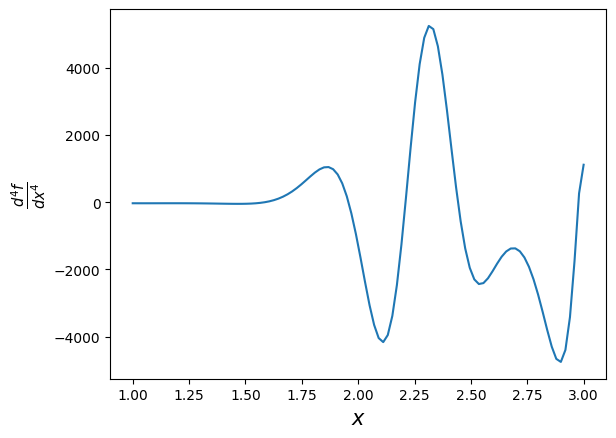

In [10]:
plt.plot(x,y)
plt.xlabel('$x$',fontsize=15)
plt.ylabel(r'$\frac{d^4f}{dx^4}$',fontsize=15)

Text(0.5, 0, '$x$')

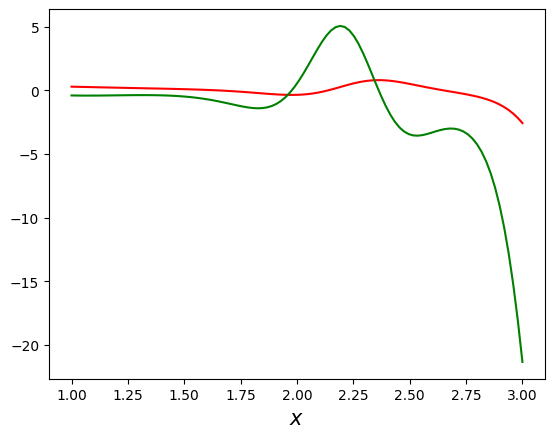

In [11]:
plt.plot(x,y_f,'r', x,y_df,'g')
plt.xlabel('$x$',fontsize=15)
#plt.ylabel(r'$\frac{d^4f}{dx^4}$',fontsize=15)

### Numerical Case

Consider the following data

In [12]:
# load the data file
x, y = np.loadtxt('sample_data1.txt')

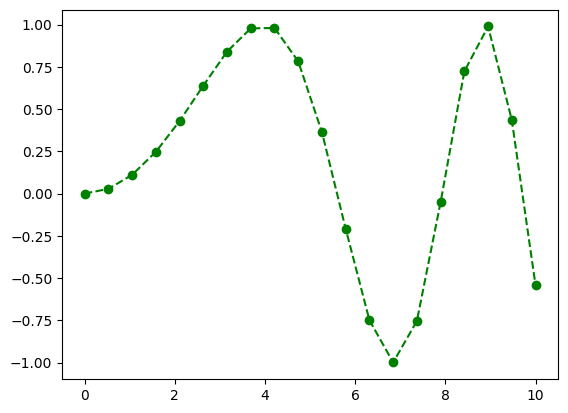

In [14]:
plt.plot(x,y,'o--',color='g')

now we'd find the derivative

#### 1. The basic way

In [15]:
dydx = np.gradient(y,x)

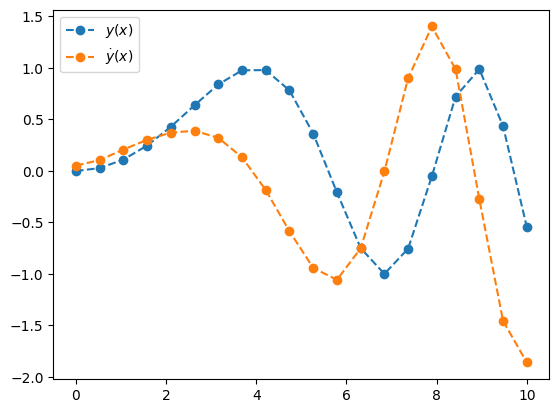

In [18]:
plt.plot(x,y,'o--',label='$y(x)$')
plt.plot(x,dydx,'o--',label='$\dot{y}(x)$')
plt.legend()

This way works fine if the data is smooth not for noisy data

In [28]:
x, y = np.loadtxt('sample_data2.txt')
dydx = np.gradient(y,x)

plot the noisy data

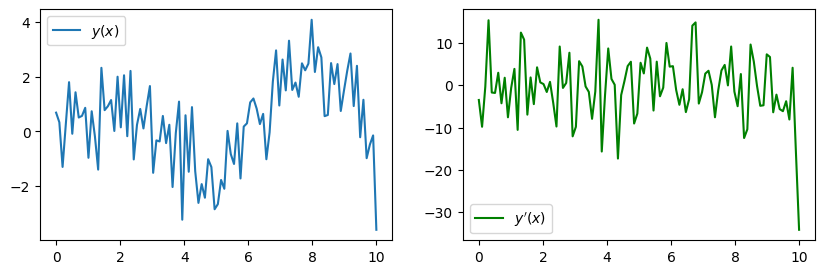

In [29]:
fig, ax = plt.subplots(1,2,figsize=(10,3))
ax[0].plot(x,y,label='$y(x)$')
ax[1].plot(x,dydx,label='${y}\' (x)$',color='g')
[a.legend() for a in ax]
plt.show()

#### 2. The clever way

Smooth the data and then take the derivative

In [30]:
x, y = np.loadtxt('coviddata.txt')
dydx = np.gradient(y,x)

plotting the data before smooothing

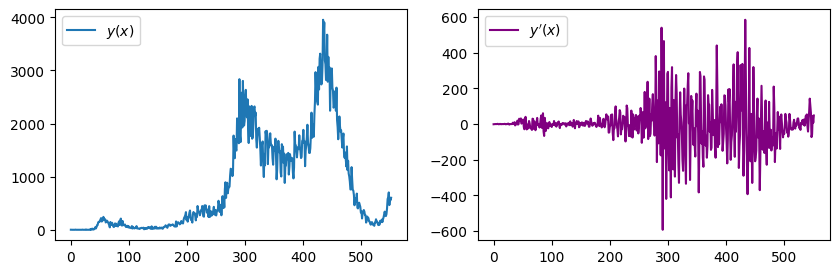

In [32]:
fig, ax = plt.subplots(1,2,figsize=(10,3))
ax[0].plot(x,y,label='$y(x)$')
ax[1].plot(x,dydx,label='$y\' (x)$',color='purple')
[a.legend() for a in ax]
plt.show()

Smooth the data by convolving it with a rectangle

In [84]:
filt = np.ones(15)/15

In [85]:
y_smooth = np.convolve(y,filt,mode='valid')
dydx_s = np.gradient(y_smooth,x[7:-7])

(-100.0, 120.0)

Text(0, 0.5, 'Covid Cases Per Day')

Text(0, 0.5, '$\\frac {\\Delta Covid Cases Per Day} {\\Delta time}$')

[Text(0.5, 0, 'Time[Days]'), Text(0.5, 0, 'Time[Days]')]

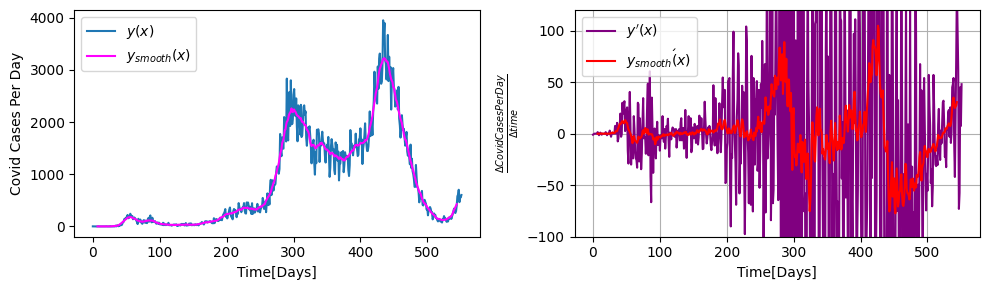

In [99]:
fig, ax = plt.subplots(1,2,figsize=(10,3))
ax[0].plot(x,y,label='$y(x)$')
ax[0].plot(x[7:-7],y_smooth,label=r'$y_{smooth}(x)$',color='magenta')
ax[1].plot(x,dydx,label='$y\' (x)$',color='purple')
ax[1].plot(x[7:-7],dydx_s,label=r'$y_{smooth}\'(x)$',color='r')
ax[1].set_ylim(-100,120)
ax[1].grid()
ax[0].set_ylabel('Covid Cases Per Day')
ax[1].set_ylabel(r'$\frac {\Delta Covid Cases Per Day} {\Delta time}$')
[a.legend() for a in ax]
[a.set_xlabel('Time[Days]') for a in ax]
fig.tight_layout()
plt.show()

### Quasi-Symbolic Case

In this case you know your function $f(x) = ...$ but the function given by a typical expression.  
For example  
$$
f(u) = \text{max} \left \{ \left |e^{-x_1 u^2} -y_i \right | \right \}
$$  
for some array of $x_i$ 's and $y_i$ 's

In [3]:
x = np.linspace(0,1,500)
y = np.exp(-x*2.15**2) + 0.1*np.random.randn(len(x))

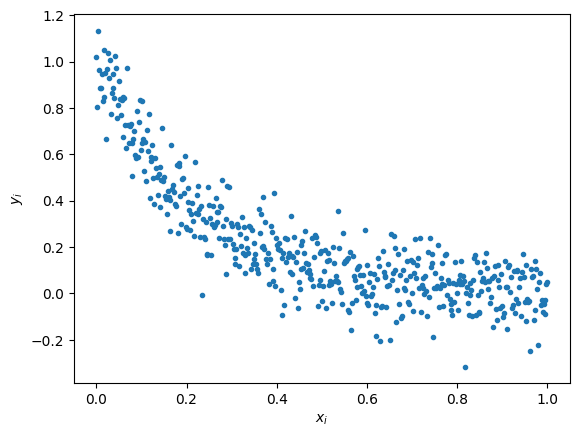

In [15]:
plt.scatter(x,y,marker='.')
plt.xlabel('$x_i$')
plt.ylabel('$y_i$')
plt.show()

In [16]:
# define a function

def f(u):
    return max ( np.abs(np.exp(-x*u**2) - y) )

compute the function values

In [18]:
u = np.linspace(0,10,40)
f_u = np.vectorize(f)(u)

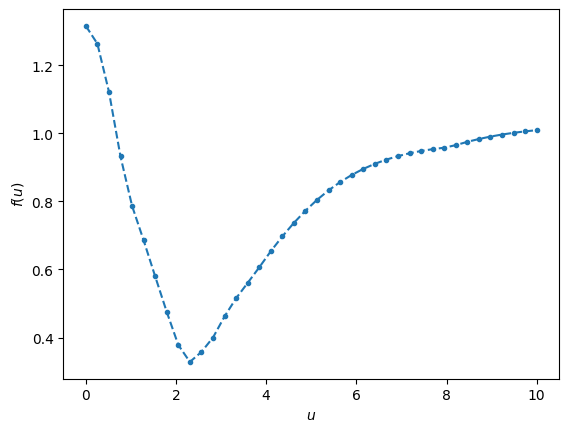

In [20]:
plt.plot(u,f_u,'.--')
plt.xlabel('$u$')
plt.ylabel('$f(u)$')
plt.show()

In [22]:
dfdu = np.vectorize(derivative)(f,u,dx=1e-6)

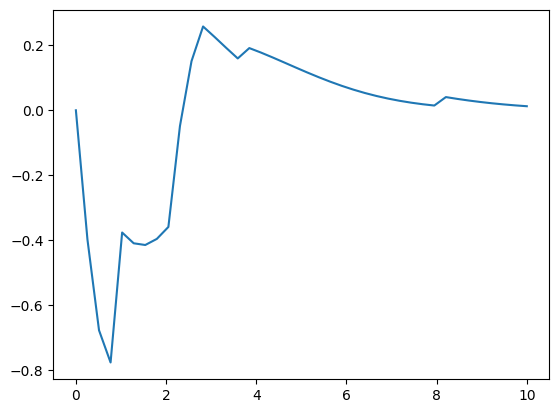

In [23]:
# plot
plt.plot(u,dfdu)